Primeras filas del dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
Dimensiones de X: (100, 2)
Dimensiones de y: (100,)


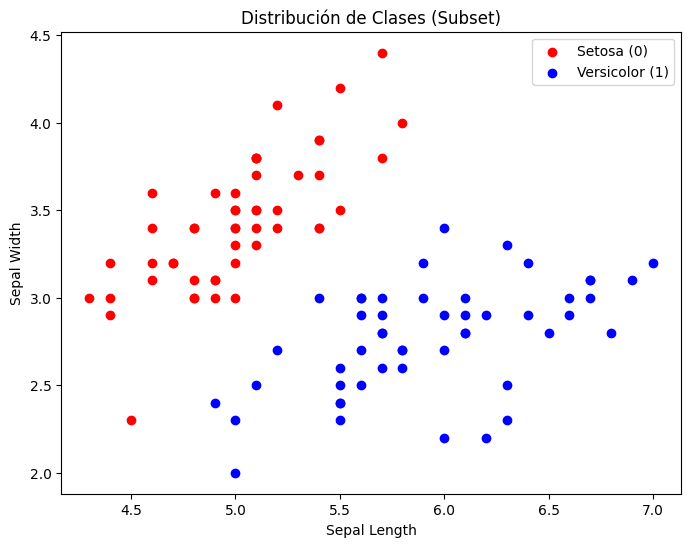

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# Cargar el dataset Iris
iris = datasets.load_iris()

# Convertir a DataFrame solo para visualización inicial
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

print("Primeras filas del dataset:")
print(df.head())

# Seleccionar solo dos clases: Setosa (0) y Versicolor (1)
# Y solo dos features: Sepal Length (index 0) y Sepal Width (index 1)
mask = df['target'].isin([0, 1])
filtered_data = df[mask]

# Extraer features y targets
X = filtered_data.iloc[:, [0, 1]].values  # Sepal length, Sepal width
y = filtered_data['target'].values        # Etiquetas: 0 y 1

# Verificar dimensiones
print(f"Dimensiones de X: {X.shape}")
print(f"Dimensiones de y: {y.shape}")

# Visualización inicial de los datos
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Setosa (0)')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Versicolor (1)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.title('Distribución de Clases (Subset)')
plt.show()

In [3]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # 1.a Inicializar pesos y bias aleatoriamente
        # Usamos una semilla para reproducibilidad, aunque no es estricto.
        np.random.seed(42)  
        self.weights = np.random.randn(n_features) * 0.01  # Pequeños valores aleatorios
        self.bias = np.random.randn() * 0.01

        # Entrenamiento. Iterar por épocas
        for _ in range(self.n_iters):
             # 2.d Regla de actualización de pesos iterando por muestras (Online learning / SGD)
            for idx, x_i in enumerate(X):
                # Predicción
                y_predicted = self.predict(x_i)
                
                # Calcular error
                # Si y_predicted == y_true, update es 0
                update = self.lr * (y[idx] - y_predicted)
                
                # Actualizar pesos y bias
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        # Implementación manual de la función lineal z = wx + b
        # Nota: X puede ser una matriz (n_samples, n_features) o un vector (n_features,)
        linear_output = np.dot(X, self.weights) + self.bias
        
        # 2.c Función de activación Step (Escalón)
        # Retorna 1 si output >= 0, sino 0
        y_predicted = np.where(linear_output >= 0, 1, 0)
        return y_predicted

In [ ]:
# Preprocesamiento de datos:

# Entrenar el modelo
perceptron = Perceptron(learning_rate=0.1, n_iters=100)
# Antes de entrenar, aseguremonos que y sea un array de enteros
y = y.astype(int)

perceptron.fit(X, y)

print("Pesos aprendidos:", perceptron.weights)
print("Bias aprendido:", perceptron.bias)

# Evaluar Accuracy en el conjunto completo (usamos el mismo conjunto para simplificar, como suele hacerse en tutoriales básicos)
predictions = perceptron.predict(X)
accuracy = np.mean(predictions == y)
print(f"Accuracy del modelo: {accuracy:.4f}")

if accuracy == 1.0:
    print("El modelo alcanzó 100% de precisión, lo que indica que los datos son linealmente separables.")
else:
    print(f"El modelo alcanzó {accuracy * 100:.2f}% de precisión.")

Pesos aprendidos: [ 4.06496714 -5.68138264]
Bias aprendido: -2.393523114618994
Accuracy del modelo: 0.9200
El modelo alcanzó 92.00% de precisión.


C:\Users\Gerardo\AppData\Local\Temp\ipykernel_21516\3839476084.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


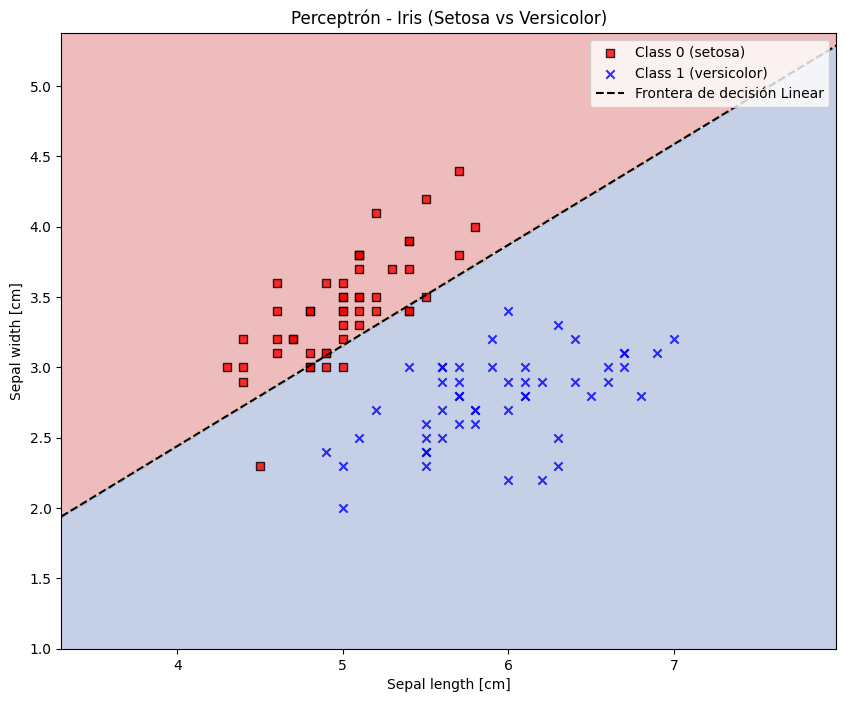

In [5]:
def plot_decision_boundary(X, y, classifier, resolution=0.02):
    plt.figure(figsize=(10, 8))
    
    # Configurar los marcadores y colores
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = plt.cm.RdYlBu
    
    # Determinar los límites del gráfico
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Crear una malla de coordenadas
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # Predeeir el resultado para cada punto en la malla
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # Dibujar contornos
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # Graficar los puntos de datos
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl} ({iris.target_names[cl]})', 
                    edgecolor='black')

    # Dibujar explícitamente la línea w1*x1 + w2*x2 + b = 0
    # x2 = -(w1*x1 + b) / w2
    w = classifier.weights
    b = classifier.bias
    
    x1_vals = np.array([x1_min, x1_max])
    if w[1] != 0:
        x2_vals = -(w[0] * x1_vals + b) / w[1]
        plt.plot(x1_vals, x2_vals, 'k--', label='Frontera de decisión Linear')
    else:
        # Si w2 es 0, la línea es vertical x1 = -b/w1
        plt.axvline(x=-b/w[0], linestyle='--', color='k', label='Frontera Vertical')


    plt.xlabel('Sepal length [cm]')
    plt.ylabel('Sepal width [cm]')
    plt.legend(loc='upper right')
    plt.title('Perceptrón - Iris (Setosa vs Versicolor)')
    plt.show()

plot_decision_boundary(X, y, perceptron)

### Conclusión sobre la Accuracy y Separabilidad Lineal
El Accuracy fue de 0.92. El modelo no logró separar perfectamente todas las muestras en las iteraciones dadas. Esto sugiere que, aunque los datos parecen separables visualmente, la configuración actual de pesos se quedó "oscilando" o no terminó de ajustar la frontera para incluir esos últimos puntos marginales. No demuestra que NO sean separables, solo que el entrenamiento no convergió completamente.